#### Gene Expression Analysis for the GSE164522 Dataset - for multiple tissues
The following notebook includes analysis for the GSE164522 gene expression tissue data for multiple tissue types. 
It utilizes general analysis techniques in addition to scanpy.

#### Set Environment

In [1]:
import pandas as pd
import scanpy as sc
from anndata import AnnData
import collections

#### Load Data

##### Expression Data

In [3]:
PN_expression = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_PN_expression.csv")
# make the Unamed:0 column the index
PN_expression.set_index('Unnamed: 0', inplace=True)
print("PN_expression shape: ", PN_expression.shape)

PT_expression = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_PT_expression.csv")
# make the Unamed:0 column the index
PT_expression.set_index('Unnamed: 0', inplace=True)
print("PT_expression shape: ", PT_expression.shape)

PBMC_expression = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_PBMC_expression.csv")
# make the Unamed:0 column the index
PBMC_expression.set_index('Unnamed: 0', inplace=True)
print("PBMC_expression shape: ", PBMC_expression.shape)

LN_expression = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_LN_expression.csv")
# make the Unamed:0 column the index
LN_expression.set_index('Unnamed: 0', inplace=True)
print("LN_expression shape: ", LN_expression.shape)

PN_expression shape:  (24662, 29795)
PT_expression shape:  (24662, 37529)
PBMC_expression shape:  (24662, 46973)
LN_expression shape:  (24662, 47523)


In [8]:
# concatenate the gene expression dataframes
all_tissue_gene_expression = pd.concat([PN_expression, PT_expression, PBMC_expression, LN_expression], axis=1)
all_tissue_gene_expression

,AAACCTGAGGTGGGTT.2,AAACCTGAGTGCTGCC.2,AAACCTGCAGTGACAG.2,AAACCTGTCTTCCTTC.2,AAAGATGAGGGTATCG.2,AAAGATGGTTAAGACA.2,AAAGCAACAAAGAATC.2,AAAGCAACACCAACCG.2,AAAGCAACAGACGCTC.2,AAAGCAACAGCGTTCG.2,...,TTTGTCAGTTCCGTCT.56,TTTGTCAGTTGTGGCC.56,TTTGTCAGTTTAGGAA.56,TTTGTCATCAGTCCCT.56,TTTGTCATCAGTTGAC.56,TTTGTCATCCACGCAG.56,TTTGTCATCGCCAAAT.56,TTTGTCATCGTCTGAA.56,TTTGTCATCTTACCTA.56,TTTGTCATCTTGTCAT.56
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
RP11-34P13.14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
FO538757.3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
FO538757.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.648227,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AC004556.1,0.0,0.0,0.0,1.319082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AC233755.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


##### TCR Data

In [9]:
vdj_cd8 = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/vdj_cd8_full.csv")
vdj_cd4 = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/vdj_cd4_full.csv")
vdj_cd8_cd4 = pd.concat([vdj_cd8, vdj_cd4], axis=0)
vdj_cd8_cd4

,Unnamed: 0,identifier_final,vdj_barcode,X.1,X,barcode,is_cell_a,contig_id_a,high_confidence_a,length_a,...,sample,patient,tissue,ID,celltype_global,celltype_major,celltype_sub,n.y,clonal_id_final,clonal_id_id
0,1,TRAV1-1-TGCGACCTGCGAACACCTCTTGTCTTT-TRAJ29-TRB...,patient15_lymph node_CAACTAGGTCCGACGT,54196,1,CAACTAGGTCCGACGT-1,True,CAACTAGGTCCGACGT-1_contig_4,True,563,...,lymph node,patient15,lymph node,44,Lymphoid-T-NK,CD8 T,hC02_CD8_Tcm-GPR183,1,clone1,P15:clone1:1
1,2,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_AGTTGGTTCAGTTGAC,20121,3,AGTTGGTTCAGTTGAC-1,True,AGTTGGTTCAGTTGAC-1_contig_2,True,522,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
2,3,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_CATGACACAAGGGTCA,20119,1,CATGACACAAGGGTCA-1,True,CATGACACAAGGGTCA-1_contig_2,True,586,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
3,4,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis tumor_GACTAACGTAGCTTGT,20120,2,GACTAACGTAGCTTGT-1,True,GACTAACGTAGCTTGT-1_contig_2,True,553,...,metastasis tumor,patient12,metastasis tumor,29,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
4,5,TRAV1-1-TGCGCCCAAGGAGACGACTACAAGCTCAGCTTT-TRAJ...,patient12_metastasis tumor_AACTTTCCAAGCCGTC,20123,5,AACTTTCCAAGCCGTC-1,True,AACTTTCCAAGCCGTC-1_contig_4,True,516,...,metastasis tumor,patient12,metastasis tumor,29,Lymphoid-T-NK,CD8 T,hC06_CD8_Tem-CXCR5,1,clone3,P12:clone3:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44099,44100,TRAV9-2-TGTGTCAAAGGCGGGCCAGGAGGAGGTGCTGACGGACT...,patient16_metastasis normal_GATGCTAAGCCGCCTA,70958,8255,GATGCTAAGCCGCCTA-1,True,GATGCTAAGCCGCCTA-1_contig_2,True,471,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC16_CD4_Tcm-ANXA1,1,clone36148,P16:clone36148:1
44100,44101,TRAV9-2-TGTGTGATCCGGGATAGCAGCTATAAATTGATCTTC-T...,patient16_metastasis normal_CACACCTGTTCCACTC,70959,8256,CACACCTGTTCCACTC-1,True,CACACCTGTTCCACTC-1_contig_3,True,489,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC24_CD4_Th1-CXCL13,1,clone36149,P16:clone36149:1
44101,44102,TRAV9-2-TGTGTTATGGGAGGTAGCAACTATAAACTGACATTT-T...,patient17_lymph node_AGGGATGGTTTGCATG,82649,11690,AGGGATGGTTTGCATG-1,True,AGGGATGGTTTGCATG-1_contig_3,True,489,...,lymph node,patient17,lymph node,56,Lymphoid-T-NK,CD4 T,hC25_CD4_Treg-FOXP3,1,clone36150,P17:clone36150:1
44102,44103,TRAV9-2-TGTTCCCGGGGGAGCAACACAGGCAAACTAATCTTT-T...,patient13_PBMC_CCTAAAGGTCTAGCGC,44319,10992,CCTAAAGGTCTAGCGC-1,True,CCTAAAGGTCTAGCGC-1_contig_2,True,517,...,PBMC,patient13,PBMC,37,Lymphoid-T-NK,CD4 T,hC16_CD4_Tcm-ANXA1,1,clone36151,P13:clone36151:1


#### Prepare data for joining

In [10]:
sample_type = 'lymph node', 'primary tumor', 'primary normal', 'PBMC'
sample_type_short = 'LN', 'PT', 'PN', 'PBMC'
GE_matrix = all_tissue_gene_expression

# extract VDJ barcodes
vdj_cd8_cd4_subset = vdj_cd8_cd4[vdj_cd8_cd4['sample'].isin(sample_type)]
vdj_cd8_cd4_subset_barcode = vdj_cd8_cd4_subset['barcode']
# split the barcodes by - and take the first element
vdj_cd8_cd4_subset_barcode = vdj_cd8_cd4_subset_barcode.str.split('-', expand=True)[0]
# make it a list
vdj_cd8_cd4_subset_barcode_list = vdj_cd8_cd4_subset_barcode.tolist()

In [12]:
# extract gene expression barcodes
# Convert Index to Series first
tissue_GE_barcode = pd.Series(GE_matrix.columns)

# Split the barcodes by '.' and take the first element of each split
tissue_GE_barcode = tissue_GE_barcode.str.split('.').str[0]

# Convert the Series to a list
tissue_GE_barcode_list = tissue_GE_barcode.tolist()

In [13]:
# create overlap list (sequences) between the two datasets
overlap = set(vdj_cd8_cd4_subset_barcode_list) & set(tissue_GE_barcode_list)
overlap_list = list(overlap)
print("The length of vdj_barcode_list is: ")
print(len(vdj_cd8_cd4_subset_barcode_list))
print("The length of GE_barcode_list is: ")
print(len(tissue_GE_barcode_list))
print("The length of the overlap is: ")
print(len(overlap))

The length of vdj_barcode_list is: 
44948
The length of GE_barcode_list is: 
161820
The length of the overlap is: 
43769


Subset Gene Expression Data

In [10]:
# Split column names at the period and keep the first part
cleaned_GE_column_names = [name.split('.')[0] for name in GE_matrix.columns]
tissue_expression_trimmed = GE_matrix.copy()
# Update the DataFrame's column names
tissue_expression_trimmed.columns = cleaned_GE_column_names
tissue_expression_trimmed_subset = tissue_expression_trimmed[overlap_list]
tissue_expression_trimmed_subset

,TTATGCTCAGGGCATA,GTGTGCGCAATCACAC,TCCACACCAGGAATGC,TCCACACCAGGAATGC,TCGGGACAGGCAAAGA,GCAATCAAGCAACGGT,GCAATCAAGCAACGGT,AGGTCCGAGGATGCGT,TGACTAGCAGTCAGCC,AAATGCCTCAAGGCTT,...,CCTATTAGTTATCGGT,TACCTTACATGTCCTC,TCTCTAAGTACCGAGA,GGGAGATTCTTCGGTC,CAACTAGTCTGTGCAA,ACACCGGCATCACCCT,TGGCCAGGTTTGACTG,GCAGCCACACCTTGTC,GCAGCCACACCTTGTC,AAATGCCAGTTGCAGG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
RP11-34P13.14,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
FO538757.3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
FO538757.2,0.880934,0.0,0.0,2.276928,1.735344,2.405645,0.0,0.0,0.805414,0.0,...,0.0,0.0,1.359226,0.0,0.0,2.255884,0.0,1.765696,1.308751,1.820057
AP006222.2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
AC004556.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.805414,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
AC233755.2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Subset TCR Data

In [11]:
barcode_list = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/LN_PN_PT_PBMC_common_13_seqs_barcodes.csv")
barcode_list = barcode_list['barcode'].to_list()

In [12]:
# # Step 1: Modify the barcode column by splitting and keeping the first part
vdj_cd8_cd4_subset['barcode'] = vdj_cd8_cd4_subset['barcode'].str.split('-', expand=True)[0]

# Step 2: Filter the DataFrame to include only rows where the modified barcodes are in overlap_list
# vdj_cd8_cd4_barcode_filtered = vdj_cd8_cd4_subset[vdj_cd8_cd4_subset['barcode'].isin(barcode_list)]
vdj_cd8_cd4_barcode_filtered = vdj_cd8_cd4_subset

/tmp/ipykernel_6376/1591969392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdj_cd8_cd4_subset['barcode'] = vdj_cd8_cd4_subset['barcode'].str.split('-', expand=True)[0]


In [13]:
# Merge
# Transpose the gene expression dataframe
tissue_expression_trimmed_subset_transposed = tissue_expression_trimmed_subset.transpose()
tissue_expression_trimmed_subset_transposed.reset_index(inplace=True)
tissue_expression_trimmed_subset_transposed.rename(columns={'index': 'barcode'}, inplace=True)

# Select desired columns from the TCR information dataframe
vdj_columns_needed = ['barcode', 'patient', 'celltype_major', 'celltype_sub', 'cdr3_a', 'cdr3_b', 'sample']
vdj_cd8_cd4_tissue_selected = vdj_cd8_cd4_barcode_filtered[vdj_columns_needed]

# Merge the two dataframes on the barcode column
merged_df = pd.merge(tissue_expression_trimmed_subset_transposed, vdj_cd8_cd4_tissue_selected, on='barcode', how='inner')
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['barcode'])

#### Subset Data with specific sequences

In [14]:
COL_NAME = 'Common_sequences'
SEQUENCES_TO_SUBSET = ['CASSLAGGGTEAFF', 'CAVMDSSYKLIF', 'CASRLAGETQYF', 'CAVQGTGAGSYQLTF', 'CASSLGGGLYEQYF', 'CAVREASGTYKYIF', 'CSAREREYEQYF', 'CASSSREETQYF', 'CLVGDRGTGGFKTIF', 'CASSLDGKGYTF', 'CAVSESSGTYKYIF', 'CSAKRGPSTDTQYF', 'CAFLNAGNMLTF'] #Zhang_GSE164522_common_sequences['cdr3_aa'].tolist() # MN_MAIT_public_top9_sequences

In [15]:
# Check if either cdr3_a or cdr3_b is in the list of top sequences
merged_df_no_duplicates[COL_NAME] = merged_df_no_duplicates.apply(
    lambda row: row['cdr3_a'] in SEQUENCES_TO_SUBSET or row['cdr3_b'] in SEQUENCES_TO_SUBSET,
    axis=1
)
merged_df_no_duplicates

/tmp/ipykernel_6376/2585126430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_no_duplicates[COL_NAME] = merged_df_no_duplicates.apply(


,barcode,RP11-34P13.7,RP11-34P13.14,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,...,AC233755.2,AC233755.1,AC240274.1,patient,celltype_major,celltype_sub,cdr3_a,cdr3_b,sample,Common_sequences
0,TTATGCTCAGGGCATA,0.0,0.0,0.0,0.880934,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient15,CD4 T,hC22_CD4_Trm-CXCR6,CAPGGRGSTLGRLYF,CASSSPGDNEQFF,primary tumor,False
1,GTGTGCGCAATCACAC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient09,CD4 T,hC27_CD4_Treg-CTLA4,CAVVPPGNTGKLIF,CASSLEGLLYQETQYF,lymph node,False
2,TCCACACCAGGAATGC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient12,CD4 T,hC27_CD4_Treg-CTLA4,CVVMNYGGSQGNLIF,CASSRTGTGGLYNSPLHF,primary tumor,False
6,TCGGGACAGGCAAAGA,0.0,0.0,0.0,1.735344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient16,CD4 T,hC15_CD4_Tn-CCR7,CAAKNPDNYGQNFVF,CSGLDRKKLFF,PBMC,False
7,GCAATCAAGCAACGGT,0.0,0.0,0.0,2.405645,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient12,CD4 T,hC19_CD4_Tn-TCF7,CAMRNSGYSTLTF,CSASTGQPGTGELFF,lymph node,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54220,CAACTAGTCTGTGCAA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient13,CD4 T,hC25_CD4_Treg-FOXP3,CAMRETNAGNMLTF,CASSQISVSYNSPLHF,primary tumor,False
54221,ACACCGGCATCACCCT,0.0,0.0,0.0,2.255884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient12,CD4 T,hC15_CD4_Tn-CCR7,CALSEPGNQFYF,CASTTSLLATYEQFF,primary normal,False
54222,TGGCCAGGTTTGACTG,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient15,CD8 T,hC08_CD8_Trm-CD6,CAMSEGGNQFYF,CASSASGVSYNEQFF,primary tumor,False
54223,GCAGCCACACCTTGTC,0.0,0.0,0.0,1.765696,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient12,CD8 T,hC03_CD8_Temra-CX3CR1,CAVNFYGNNRLAF,CASSSVAGPGELFF,PBMC,False


In [20]:
# what are the seuqneces from SEQUENCES_TO_SUBSET that are in the cdr3_a or cdr3_b columns
unique_alpha_beta_sequences = merged_df_no_duplicates[merged_df_no_duplicates[COL_NAME] == True][['cdr3_a', 'cdr3_b']].drop_duplicates()
# what sequences are present in either unique_alpha_beta_sequences['cdr3_a'] and unique_alpha_beta_sequences['cdr3_b'] and are in SEQUENCES_TO_SUBSET
unique_a = unique_alpha_beta_sequences['cdr3_a'].unique()
unique_b = unique_alpha_beta_sequences['cdr3_b'].unique()
unique_a_b = set(unique_a) | set(unique_b)
# which sequences are in SEQUENCES_TO_SUBSET and are in unique_a_b
unique_a_b_intersection = set(unique_a_b) & set(SEQUENCES_TO_SUBSET)
unique_a_b_intersection

{'CASSLAGGGTEAFF',
 'CASSLDGKGYTF',
 'CASSLGGGLYEQYF',
 'CASSSREETQYF',
 'CAVMDSSYKLIF',
 'CAVQGTGAGSYQLTF',
 'CAVSESSGTYKYIF',
 'CLVGDRGTGGFKTIF'}

##### Data analysis of sub-groups

In [21]:
print("The number of rows associated with the common sequnece list is:")
collections.Counter(merged_df_no_duplicates[COL_NAME])

The number of rows associated with the common sequnece list is:


Counter({False: 43724, True: 45})

In [17]:
# cells that include one or more of the top sequences
TRUE_cells_df = merged_df_no_duplicates[merged_df_no_duplicates[COL_NAME] == True]

In [18]:
TRUE_cells_df_alpha_mait = TRUE_cells_df[TRUE_cells_df['cdr3_a'] == 'CAVMDSSYKLIF']
TRUE_cells_df_alpha_mait

,barcode,RP11-34P13.7,RP11-34P13.14,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,...,AC233755.2,AC233755.1,AC240274.1,patient,celltype_major,celltype_sub,cdr3_a,cdr3_b,sample,Common_sequences
6047,AAATGCCTCGTACCGG,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient14,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSEGGDTGELFF,primary tumor,True
7189,GATCGCGCACCCATTC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient14,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CSARGEGVREEQYF,primary tumor,True
7404,CACACTCTCGTCTGCT,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient13,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CSARGGSGGMQETQYF,primary normal,True
7860,CGGCTAGTCACCATAG,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient12,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CSAREGGGSETQYF,PBMC,True
10473,TACCTTAGTATATCCG,0.0,0.0,0.0,1.668184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient13,CD4 T,hC23_CD4_Th17-IL23R,CAVMDSSYKLIF,CSARGSGRQGPGETQYF,primary tumor,True
11281,ACAGCCGGTTAGATGA,0.0,0.0,0.0,1.351816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient17,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSEASGGADTQYF,primary tumor,True
16272,TTCCCAGCAATCGAAA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient17,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSEASGGADTQYF,primary tumor,True
18178,TCAGGTACATCGGACC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient17,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSDSSEADTQYF,primary tumor,True
19698,CGATTGAGTAGAGGAA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient17,CD4 T,hC28_CD4_HSPA1A,CAVMDSSYKLIF,CASSEASGGADTQYF,primary tumor,True
22485,TCGCGTTAGCCGCCTA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,patient10,CD4 T,hC28_CD4_HSPA1A,CAVMDSSYKLIF,CSAEVTGTDTQYF,primary tumor,True


In [33]:
# Group by celltype_sub and get unique sequences for cdr3_a and cdr3_b
unique_sequences_a = TRUE_cells_df.groupby('celltype_sub')['cdr3_a'].unique().reset_index()
unique_sequences_b = TRUE_cells_df.groupby('celltype_sub')['cdr3_b'].unique().reset_index()

# Merge the two dataframes on celltype_sub
unique_sequences = pd.merge(unique_sequences_a, unique_sequences_b, on='celltype_sub', how='outer')

# Rename the columns for clarity
unique_sequences.columns = ['celltype_sub', 'unique_cdr3_a', 'unique_cdr3_b']
unique_sequences

,celltype_sub,unique_cdr3_a,unique_cdr3_b
0,hC02_CD8_Tcm-GPR183,[CAVMDSSYKLIF],[CASSSSRDRGTGELFF]
1,hC04_CD8_Temra-CX3CR1|RGS1,[CAENSGYSTLTF],[CASSLAGGGTEAFF]
2,hC05_CD8_Tem-GZMK,"[CLVGDRGTGGFKTIF, CAENSGYSTLTF]","[CASSSRQETQYF, CASSLAGGGTEAFF, CASSSREETQYF]"
3,hC06_CD8_Tem-CXCR5,[CAMREGTGGYNKLIF],[CASSLGGGLYEQYF]
4,hC10_CD8_Trm-KLRB1,[CLVGDRGTGGFKTIF],[CASSSRQETQYF]
5,hC11_CD8_Tex-LAYN,[CAVMDSSYKLIF],[CASSEASGGADTQYF]
6,hC14_CD8_MAIT-SLC4A10,[CAVMDSSYKLIF],"[CASSEGGDTGELFF, CSARGEGVREEQYF, CSARGGSGGMQET..."
7,hC16_CD4_Tcm-ANXA1,"[CAVSESSGTYKYIF, CAVMDSSYKLIF, CVVNKGGSYIPTF]","[CSAALAGGTGELFF, CASSYSDTDTQYF, CASSLAGGGTEAFF..."
8,hC19_CD4_Tn-TCF7,[CLVGDRGTGGFKTIF],[CASSSRQETQYF]
9,hC22_CD4_Trm-CXCR6,[CAVQGTGAGSYQLTF],[CASSLDGKGYTF]


In [32]:
collections.Counter(TRUE_cells_df['celltype_sub'])

Counter({'hC14_CD8_MAIT-SLC4A10': 20,
         'hC28_CD4_HSPA1A': 5,
         'hC05_CD8_Tem-GZMK': 5,
         'hC16_CD4_Tcm-ANXA1': 4,
         'hC06_CD8_Tem-CXCR5': 2,
         'hC23_CD4_Th17-IL23R': 2,
         'hC26_CD4_Tfr-IL10': 1,
         'hC04_CD8_Temra-CX3CR1|RGS1': 1,
         'hC02_CD8_Tcm-GPR183': 1,
         'hC22_CD4_Trm-CXCR6': 1,
         'hC11_CD8_Tex-LAYN': 1,
         'hC19_CD4_Tn-TCF7': 1,
         'hC10_CD8_Trm-KLRB1': 1})

In [19]:
collections.Counter(TRUE_cells_df['cdr3_a'])

Counter({'CAVMDSSYKLIF': 32,
         'CLVGDRGTGGFKTIF': 4,
         'CAENSGYSTLTF': 4,
         'CAMREGTGGYNKLIF': 2,
         'CAVSESSGTYKYIF': 1,
         'CAVQGTGAGSYQLTF': 1,
         'CVVNKGGSYIPTF': 1})

In [34]:
collections.Counter(TRUE_cells_df['cdr3_b'])

Counter({'CASSEASGGADTQYF': 9,
         'CASSLAGGGTEAFF': 5,
         'CSAEVTGTDTQYF': 4,
         'CASSSRQETQYF': 3,
         'CSARDGQPQETQYF': 2,
         'CASSLGGGLYEQYF': 2,
         'CSARGEGVREEQYF': 2,
         'CASSYSGNYNEQFF': 1,
         'CASSQERGSGANVLTF': 1,
         'CASSSSRDRGTGELFF': 1,
         'CASSEGGDTGELFF': 1,
         'CASSLDGKGYTF': 1,
         'CSAREGGGSETQYF': 1,
         'CASSQEEGGTGELFF': 1,
         'CASSELAGGQETQYF': 1,
         'CASSSREETQYF': 1,
         'CASEGLAGGSYTQYF': 1,
         'CASSELAGSYNEQFF': 1,
         'CSARGSGRQGPGETQYF': 1,
         'CSAALAGGTGELFF': 1,
         'CASSRLAGEQETQYF': 1,
         'CSARGGSGGMQETQYF': 1,
         'CASSDSSEADTQYF': 1,
         'CASSEASGGAETQYF': 1,
         'CASSYSDTDTQYF': 1})

In [19]:
# Create a new column for categorical conversion
merged_df_no_duplicates_cp = merged_df_no_duplicates.copy()

NEW_COL_NAME = COL_NAME + '_new'
# Perform the conversion to categorical without warnings
merged_df_no_duplicates_cp[NEW_COL_NAME] = pd.Categorical(merged_df_no_duplicates[COL_NAME].astype(int), categories=[0, 1])

# Check the new column's data type and categories
print("Data type:", merged_df_no_duplicates_cp[NEW_COL_NAME].dtype)
print("Categories:", merged_df_no_duplicates_cp[NEW_COL_NAME].cat.categories)


Data type: category
Categories: Index([0, 1], dtype='int64')


#### Gene Expression Analysis Using Scanpy

In [24]:
# Drop non-gene expression columns from the main data matrix
gene_expression_data = merged_df_no_duplicates_cp.drop(columns=['barcode', 'patient', 'celltype_major', 'celltype_sub', 'cdr3_a', 'cdr3_b', 'sample', NEW_COL_NAME, COL_NAME])

# Create AnnData object
adata = AnnData(gene_expression_data)

# Add metadata
# adata.obs['top_MN_MAIT'] = merged_df_no_duplicates['top_MN_MAIT'].astype('category')
adata.obs = merged_df_no_duplicates_cp[[NEW_COL_NAME, 'celltype_major', 'celltype_sub', 'sample']]

# Verify the structure
print(adata)

AnnData object with n_obs × n_vars = 43769 × 24662
    obs: 'Common_sequences_new', 'celltype_major', 'celltype_sub', 'sample'


/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [25]:
# Preliminary filtering
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)

# Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

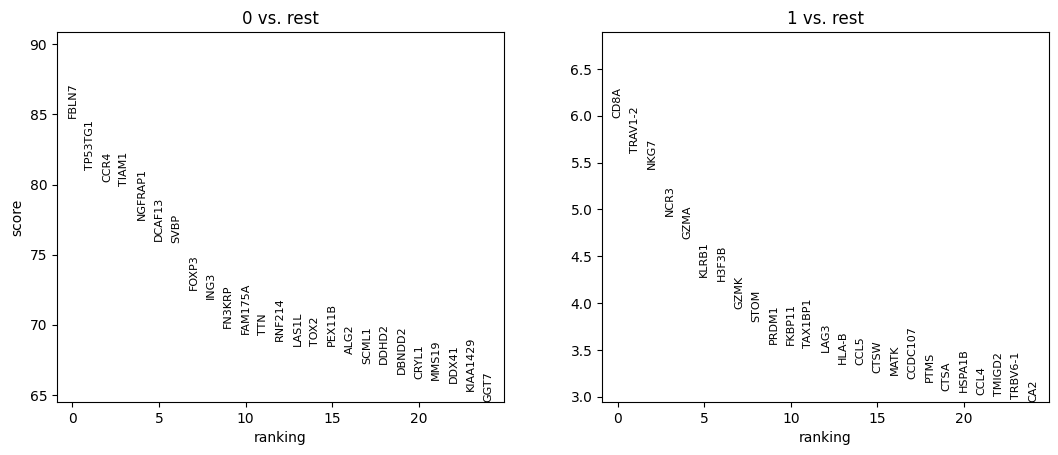

In [26]:
# Perform the differential expression
sc.tl.rank_genes_groups(adata, NEW_COL_NAME, method='t-test')

# Plot the top differentially expressed genes
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

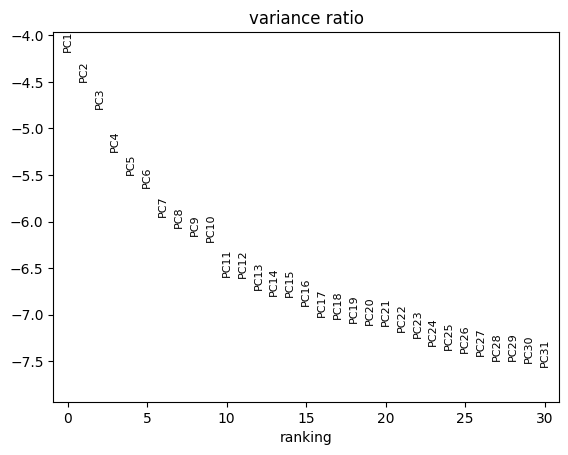

In [38]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')

# Plot PCA
sc.pl.pca_variance_ratio(adata, log=True)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


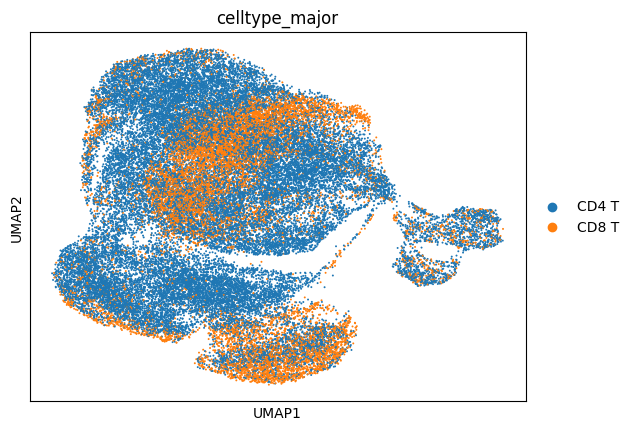

In [39]:
# Clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
sc.tl.umap(adata)
# sc.pl.umap(adata, color=['leiden', 'top_MN_MAIT'], wspace=0.5, size=3)
sc.pl.umap(adata, color=['celltype_major'], wspace=0.5, size=8)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


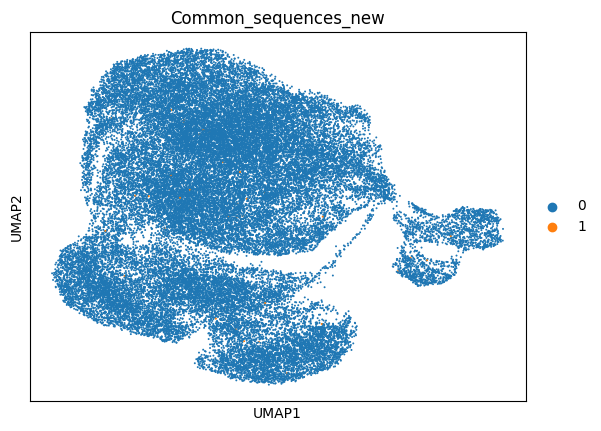

In [40]:
# sc.pl.umap(adata, color=['leiden', 'top_MN_MAIT'], wspace=0.5, size=3)
sc.pl.umap(adata, color=[NEW_COL_NAME], wspace=0.5, size=8)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


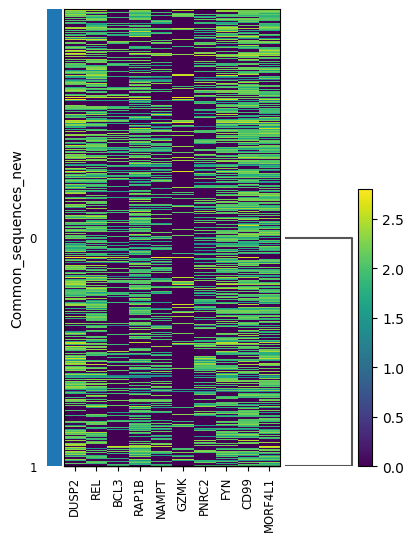

In [168]:
sc.tl.rank_genes_groups(adata, NEW_COL_NAME, method='t-test')

# Assuming you want to look at the top 10 marker genes
top_genes_1 = sc.get.rank_genes_groups_df(adata, group='1')  # Adjust the group as needed
top_genes_1 = top_genes_1.sort_values('scores', ascending=False).head(10)['names']

sc.pl.heatmap(adata, var_names=top_genes_1, groupby=NEW_COL_NAME, cmap='viridis', dendrogram=True)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


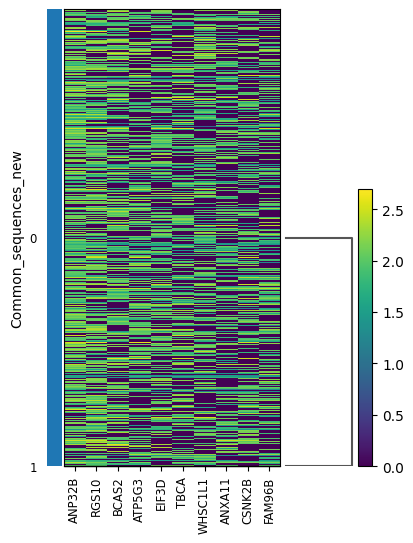

In [169]:
# Assuming you want to look at the top 10 marker genes
top_genes_0 = sc.get.rank_genes_groups_df(adata, group='0')  # Adjust the group as needed
top_genes_0 = top_genes_0.sort_values('scores', ascending=False).head(10)['names']

sc.pl.heatmap(adata, var_names=top_genes_0, groupby=NEW_COL_NAME, cmap='viridis', dendrogram=True)